In [43]:
using RDatasets

# load iris dataset
iris = dataset("datasets", "iris")

# split half to training set
Xtr = Matrix(iris[1:2:end,1:4])'
Xtr_labels = Vector(iris[1:2:end,5])

# split other half to testing set
Xte = Matrix(iris[2:2:end,1:4])'
Xte_labels = Vector(iris[2:2:end,5]);

In [44]:
using Revise
using ExpFamilyPCA

In [63]:
epca = PoissonEPCA()
frames = []
A = nothing
for i in 1:50
    A = fit!(epca, Xtr'; maxoutdim=3, verbose=i % 5 == 0, maxiter=1, A_init=A)
    push!(frames, A)
end

Iteration: 1/1 | Loss: 6.663730141685787
Iteration: 1/1 | Loss: 4.625855594711395
Iteration: 1/1 | Loss: 4.007678629213446
Iteration: 1/1 | Loss: 3.519002794344326
Iteration: 1/1 | Loss: 3.2765682810684793
Iteration: 1/1 | Loss: 3.164566443003272
Iteration: 1/1 | Loss: 3.0558874698234355
Iteration: 1/1 | Loss: 3.002771480502954
Iteration: 1/1 | Loss: 2.9738820727916613
Iteration: 1/1 | Loss: 2.855615251963713


In [64]:
A'

3×75 adjoint(::Matrix{Float64}) with eltype Float64:
 0.923188  0.913917  0.92129  …  1.01827   1.04163  1.01696  1.03274
 1.05654   1.04342   1.04729     0.998606  1.00611  1.00809  1.00071
 1.65296   1.09185   1.64053     1.65228   1.66713  1.06961  1.65595

┌ Info: Saved animation to /var/folders/5c/v1kwkyv90sb9jdq1rrpfxg540000gn/T/jl_lCxmXAVmRS.gif
└ @ Plots /Users/logan/.julia/packages/Plots/a3u1v/src/animation.jl:156


Plots.AnimatedGif("/var/folders/5c/v1kwkyv90sb9jdq1rrpfxg540000gn/T/jl_lCxmXAVmRS.gif")
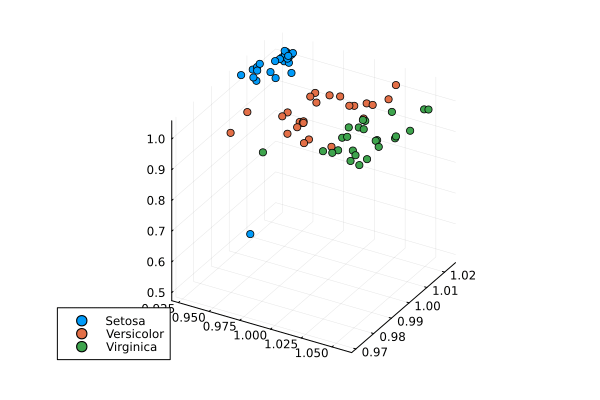

In [65]:
@gif for frame in frames
    Ytr = frame'
    setosa = Ytr[:, Xtr_labels .== "setosa"]
    versicolor = Ytr[:, Xtr_labels .== "versicolor"]
    virginica = Ytr[:, Xtr_labels .== "virginica"]
    p = scatter(setosa[1, :], setosa[2, :], setosa[3, :], marker=:circle, linewidth=0, label="Setosa")
    scatter!(versicolor[1, :], versicolor[2, :], versicolor[3, :], marker=:circle, linewidth=0, label="Versicolor")
    scatter!(virginica[1, :], virginica[2, :], virginica[3, :], marker=:circle, linewidth=0, label="Virginica")
    plot!(p)
end